<a href="https://colab.research.google.com/github/MAHMUDSWE/ML/blob/main/Problem_set_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

#Mounting Google Drive


In [50]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Load Dataset

In [51]:
train_path = '/content/drive/MyDrive/Project/ML/problem01/train'
val_path = '/content/drive/MyDrive/Project/ML/problem01/val'
test_path = '/content/drive/MyDrive/Project/ML/problem01/test'

In [52]:
#set up data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
#set batch size and image dimensions
batch_size = 32
img_height, img_width = 150, 150

#Generate batches of augmented data

In [54]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# Define and train the model

In [55]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Checking the sample and batch size for tranning purpose

In [57]:
print("Number of samples in the training set:", train_generator.samples)
print("Number of samples in the training set:", val_generator.samples)
print("Batch size:", batch_size)

Number of samples in the training set: 5216
Number of samples in the training set: 16
Batch size: 32


# Train model

In [58]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=10
)

Epoch 1/10
163/163 [==============================] - 1111s 6s/step - loss: 0.3463 - accuracy: 0.8522 - val_loss: 0.5563 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 403s 2s/step - loss: 0.2565 - accuracy: 0.8947 - val_loss: 0.5549 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 381s 2s/step - loss: 0.1877 - accuracy: 0.9237 - val_loss: 0.7203 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 385s 2s/step - loss: 0.1662 - accuracy: 0.9375 - val_loss: 0.4672 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 385s 2s/step - loss: 0.1453 - accuracy: 0.9427 - val_loss: 1.0835 - val_accuracy: 0.6250
Epoch 6/10
163/163 [==============================] - 385s 2s/step - loss: 0.1352 - accuracy: 0.9498 - val_loss: 0.6970 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 383s 2s/step - loss: 0.1395 - accuracy: 0.9490 - val_loss: 0.9763 - val_accuracy: 0.625

# Generate test data

In [59]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 624 images belonging to 2 classes.


# Evaluate and print the accuracy of the model on test data

In [64]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))

print("test data accuracy: {:.2f}%".format(test_acc * 100))

20/20 [==============================] - 18s 888ms/step - loss: 0.3382 - accuracy: 0.8862
test data accuracy: 88.62%


# Prediction on test data

In [ ]:
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = (predictions > 0.5).astype(int)

# Printing classification report and confusion matrix

In [63]:
print("Classification Report:\n", classification_report(test_generator.classes, predicted_classes))
print("Confusion Matrix:\n", confusion_matrix(test_generator.classes, predicted_classes))

20/20 [==============================] - 30s 1s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.31      0.35       234
           1       0.63      0.70      0.66       390

    accuracy                           0.56       624
   macro avg       0.51      0.51      0.50       624
weighted avg       0.54      0.56      0.54       624

Confusion Matrix:
 [[ 73 161]
 [116 274]]


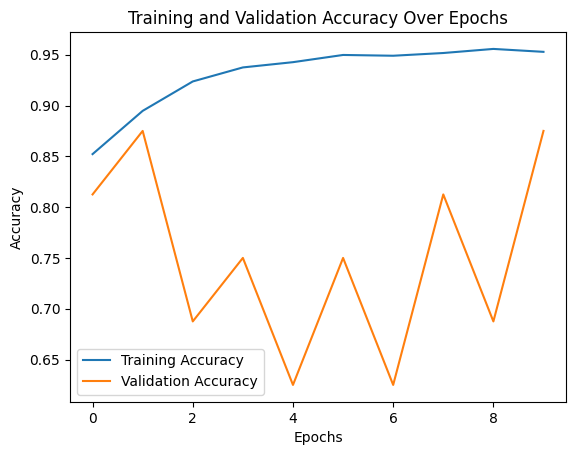

In [62]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()